In [ ]:
import numpy as np 

In [ ]:
a = np.arange(15).reshape(3,5)

In [ ]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
a @ [1,0,0,0,0]

array([ 0,  5, 10])

In [ ]:
b = np.array([1,0,0,0,0])

In [ ]:
b.reshape(5,1)

array([[1],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
a @ b.reshape(5,1)

array([[ 0],
       [ 5],
       [10]])

In [ ]:
c = a @ b.reshape(5,1)
c.T.ravel() # ravel() flatten the array 

array([ 0,  5, 10])

# First implementation of kalman filter !! 

## Constant Velocity linear model of kalman filter 





$$x = 
[p^T \, v^T]^T
\in \mathbb{R}^{4\times 1}$$

$$p^T = [p^x \, p^y]$$

In [ ]:
p_0 = np.array([1,0]) # The initial position !

$$v^T = [ v^x \, v^y]$$

In [ ]:
p_0 = np.array([1,1]) # The initial velocity !

\begin{equation}
\Phi ^{CV}= 
\begin{pmatrix}
 I_{2\times 2} & \Delta t I_{2\times 2} \\
 0 & I_{2\times 2}
\end{pmatrix}
\in \mathbb{R}^{4\times 4}
\end{equation}

In [ ]:
delta_t = 0.5
upper = np.concatenate((np.eye(2),delta_t*np.eye(2)),axis=1)
#np.concatenate(np.eye(2),np.eye(2))
lower = np.concatenate((np.zeros((2,2)),np.eye(2)),axis=1)
phi_cv = np.concatenate((upper,lower))
phi_cv

array([[1. , 0. , 0.5, 0. ],
       [0. , 1. , 0. , 0.5],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ]])

# Process noise covariance matrix
\begin{equation}
Q^{CV}_k= 
\begin{pmatrix}
 0_{2\times 2} & 0_{2\times 2} \\
 0_{2\times 2} & 
 \begin{pmatrix}
 q_k^x & 0 \\
 0 & q_k^y
 \end{pmatrix}
\end{pmatrix}
\in \mathbb{R}^{4\times 4}
\end{equation}

In [ ]:
Q = np.zeros((4,4))
Q[2,2] = 0.2 # q_k^x
Q[3,3] = 0.2 # q_k^y
Q

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0.2]])

# measurement matrix 
\begin{equation}
H^{CV}=
\begin{pmatrix}
I_{2\times 2} & 0_{2 \times 2}
\end{pmatrix}
\in \mathbb{R}^{2\times 4}
\end{equation}

In [ ]:
H_CV = np.concatenate((np.eye(2),np.zeros((2,2))),axis=1)
H_CV

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
A = np.eye(2)
A[0,1] = 1 
np.linalg.inv(A)
A.T

array([[1., 0.],
       [1., 1.]])

# Practical Code 

In [ ]:
def kalman_filter(x,P,phi,Q,H,R,z): # R is the measurement noise covariance 
    x_minus = phi @ x # Estimate position 
    P_minus = phi @ P @ phi.T + Q # estimate covariance matrix 
    K_k = P_minus @ H.T @ np.linalg.inv(H @ P_minus@ H.T+R)  # Kalman Gain
    innovation = z - H @ x_minus
    return x_minus + K_k @ innovation , P_minus - K_k@H@P_minus

In [ ]:
x_0 = np.array([1,0,0,0]).reshape(4,1)
x_0

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
phi_cv @ x_0 

array([[1.],
       [0.],
       [0.],
       [0.]])

In [ ]:
P_0 = np.arange(16).reshape(4,4)
P_0

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [ ]:
z = np.array([0,1]).reshape(2,1)
R = np.array([[1,2],
              [1,-1]])

In [ ]:

x_1 , P_1 = kalman_filter(x_0,P=P_0,phi=phi_cv,Q=Q,H=H_CV,R=R,z=z)

In [ ]:
x_1

array([[ 0.4109589 ],
       [-0.01369863],
       [ 0.11872146],
       [ 0.50228311]])

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(np.array([[1, -1], [1, 1]]))

In [ ]:
eigenvectors

array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]])

In [ ]:
eigenvectors[:,0] # The first eigen vector 

array([0.70710678+0.j        , 0.        -0.70710678j])

In [ ]:
P_1[:2,:2]

array([[0.78082192, 1.2739726 ],
       [1.2739726 , 0.65753425]])

In [ ]:
P_1

array([[ 0.78082192,  1.2739726 ,  0.95890411,  1.28767123],
       [ 1.2739726 ,  0.65753425,  0.30136986, -0.10958904],
       [ 0.95890411,  0.30136986,  0.25479452, -0.38356164],
       [ 1.28767123, -0.10958904, -0.38356164, -1.11506849]])

In [ ]:
eigen_value, eigen_vector = np.linalg.eig(P_1[:2,:2])

In [ ]:
eigen_vector[:,0]

array([0.72399259, 0.68980774])

In [ ]:
eigen_vector[:,1]

array([-0.68980774,  0.72399259])

In [ ]:
eigen_vector

array([[ 0.72399259, -0.68980774],
       [ 0.68980774,  0.72399259]])

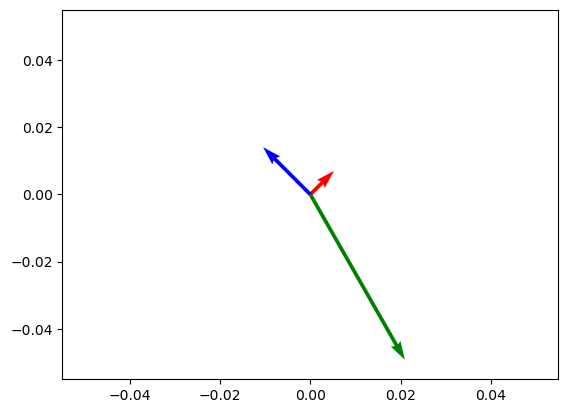

In [ ]:
#Example !! 
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[1,1], [-2,2], [4,-7]])
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point

plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()

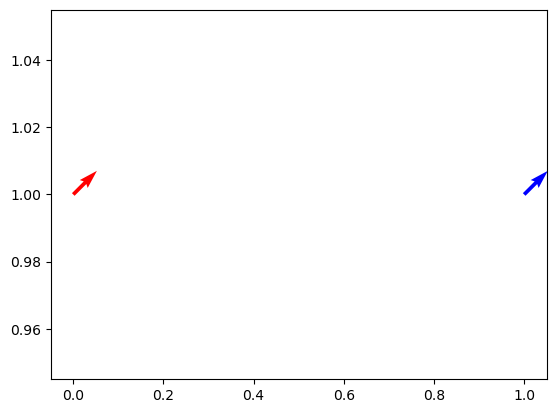

In [ ]:
# TO DELETE 
import numpy as np
import matplotlib.pyplot as plt

origin = np.array([(0,1),(1,1)])
V = np.array([(1,1), 
                   (1,1)]) # origin point

plt.quiver(origin[:,0],origin[:,1], V[:,0], V[:,1], color=['r','b','g'], scale=21)
plt.show()

In [ ]:
eigen_value0, eigen_vector0 = np.linalg.eig(P_0[:2,:2])
eigen_value1, eigen_vector1 = np.linalg.eig(P_1[:2,:2])

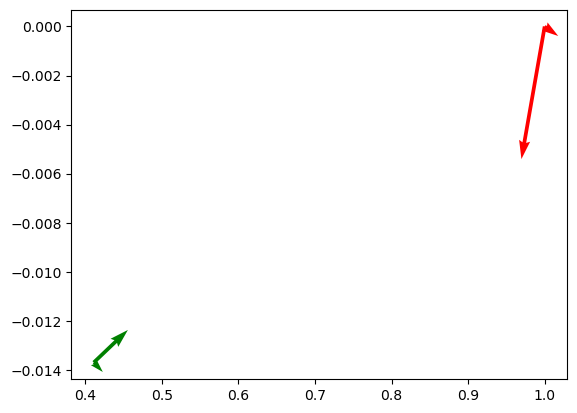

In [ ]:
#Example !! 
import numpy as np
import matplotlib.pyplot as plt

origin = np.array([x_0[:2],x_0[:2], x_1[:2], x_1[:2]])
V = np.array([eigen_vector0[:,0]*eigen_value0[0], 
                   eigen_vector0[:,1]*eigen_value0[1], 
                   eigen_vector1[:,0]*eigen_value1[0],
                   eigen_vector1[:,1]*eigen_value1[1]]) # origin point

plt.quiver(origin[:,0],origin[:,1], V[:,0], V[:,1], color=['r','r','g','g'], scale=21)
plt.show()

array([[[1.],
        [0.]]])

In [ ]:
x_1[:2]

array([[ 0.4109589 ],
       [-0.01369863]])

In [ ]:
pos = np.array([1,0]).reshape(2,1)
v= np.array([1,1]).reshape(2,1)
np.concatenate((pos,v),axis=0)

array([[1],
       [0],
       [1],
       [1]])

# Simple Linear Kalman filter 
## Constant velocity problem 
In direction (1,1)

In [ ]:
#x_0 = np.array([1,0,1,1]).reshape(4,1)
P_0 = np.arange(16).reshape(4,4)
z = np.array([0,1]).reshape(2,1)
R = np.array([[10,0],
              [0,10]])
v= np.array([1,1]).reshape(2,1)
pos = np.array([1,0]).reshape(2,1)
x_0 = np.concatenate((pos,v),axis=0)

In [ ]:
Q = np.zeros((4,4))
Q[2,2] = 0.2 # q_k^x
Q[3,3] = 0.2 # q_k^y
Q

array([[0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 0.2]])

In [ ]:
H_CV = np.concatenate((np.eye(2),np.zeros((2,2))),axis=1)
H_CV

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
delta_t = 0.5
upper = np.concatenate((np.eye(2),delta_t*np.eye(2)),axis=1)
lower = np.concatenate((np.zeros((2,2)),np.eye(2)),axis=1)
phi_cv = np.concatenate((upper,lower))
phi_cv

array([[1. , 0. , 0.5, 0. ],
       [0. , 1. , 0. , 0.5],
       [0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. ]])

In [ ]:
x_n_minus_one = x_0
P_n_minus_one = P_0
location_arr = []
location_uncertainty = []
for t in np.arange(0, 10, 0.5):
    location_arr.append(x_n_minus_one[:2])
    location_arr.append(x_n_minus_one[:2])
    eigen_value, eigen_vector = np.linalg.eig(P_n_minus_one[:2,:2])
    location_uncertainty.append(eigen_vector[:,0]*eigen_value[0])
    location_uncertainty.append(eigen_vector[:,1]*eigen_value[1])
    z = v*t + x_0[:2]
    x_n,P_n = kalman_filter(x_n_minus_one,
                            P_n_minus_one,
                            phi_cv,
                            Q,
                            H_CV,R,z)
    #x_n,P_n = x_n_minus_one,P_n_minus_one
    x_n_minus_one,P_n_minus_one =  x_n,P_n

In [ ]:
origin = np.array(location_arr)
V = np.array(location_uncertainty)

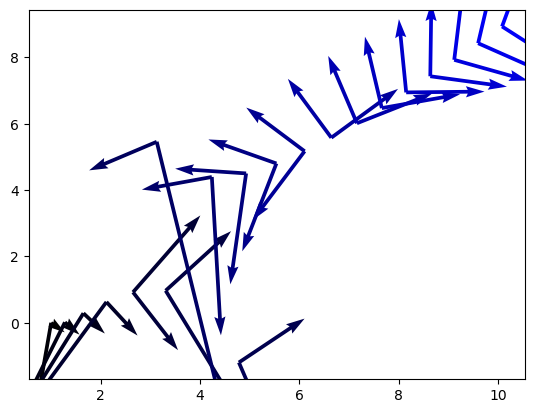

In [ ]:
qui = plt.quiver(origin[:,0],origin[:,1], V[:,0], V[:,1], scale=21,color=[(0, 0, i) for i in np.linspace(0,1,40) ])
#plt.quiverkey(qui, origin[:,0].ravel(), origin[:,1].ravel(), np.ones(origin[:,1].shape).ravel(), ['b' for _ in range(origin[:,1].shape[0])])
#plt.quiverkey(qui,0.7,0,2,"diker")
#plt.quiverkey(qui,4,4,100,"barak")

plt.show()

In [ ]:
origin

array([[[ 1.        ],
        [ 0.        ]],

       [[ 1.        ],
        [ 0.        ]],

       [[ 1.        ],
        [ 0.        ]],

       [[ 1.        ],
        [ 0.        ]],

       [[ 1.37705333],
        [ 0.59191592]],

       [[ 1.37705333],
        [ 0.59191592]],

       [[ 1.89911088],
        [ 1.31433928]],

       [[ 1.89911088],
        [ 1.31433928]],

       [[ 2.55799177],
        [ 2.14606006]],

       [[ 2.55799177],
        [ 2.14606006]],

       [[ 3.34868667],
        [ 3.05280394]],

       [[ 3.34868667],
        [ 3.05280394]],

       [[ 4.25104591],
        [ 3.93200088]],

       [[ 4.25104591],
        [ 3.93200088]],

       [[ 5.38690581],
        [ 4.54917487]],

       [[ 5.38690581],
        [ 4.54917487]],

       [[ 8.09673173],
        [ 3.54560838]],

       [[ 8.09673173],
        [ 3.54560838]],

       [[-0.55087049],
        [13.6325544 ]],

       [[-0.55087049],
        [13.6325544 ]],

       [[ 4.04342159],
        [10.66145

In [ ]:
origin[:,1].shape[0]

40

In [ ]:
np.ones(origin[:,1].shape).ravel()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [ ]:
origin[:,0].ravel()

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.37705333,
        1.37705333,  1.89911088,  1.89911088,  2.55799177,  2.55799177,
        3.34868667,  3.34868667,  4.25104591,  4.25104591,  5.38690581,
        5.38690581,  8.09673173,  8.09673173, -0.55087049, -0.55087049,
        4.04342159,  4.04342159,  5.13952367,  5.13952367,  5.81253301,
        5.81253301,  6.3126323 ,  6.3126323 ,  6.64816606,  6.64816606,
        6.56822507,  6.56822507,  0.39366976,  0.39366976, 11.1506184 ,
       11.1506184 , 10.51943398, 10.51943398, 10.74656939, 10.74656939])

In [ ]:
['b' for _ in range(origin[:,1].shape[0])]

['b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b']

In [ ]:
np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

# Example With different Velocities 

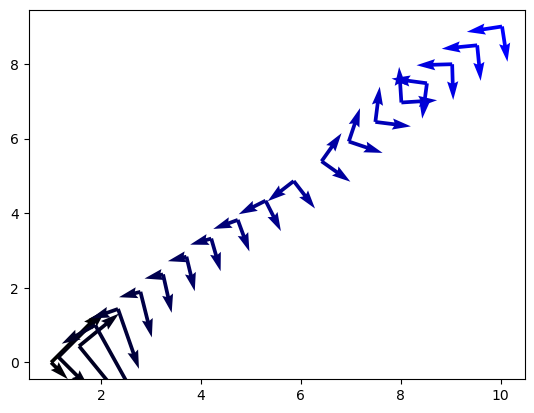

In [ ]:
#x_0 = np.array([1,0,1,1]).reshape(4,1)
P_0 = np.arange(16).reshape(4,4)
P_0 = np.array([
    [1,2,3,4],
    [2,1,2,3],
    [3,2,1,2],
    [4,3,2,1]
])


z = np.array([0,1]).reshape(2,1)
R = np.array([[4,0],
              [0,4]])
v= np.array([1,1]).reshape(2,1)
pos = np.array([1,0]).reshape(2,1)
x_0 = np.concatenate((pos,v),axis=0)

Q = np.zeros((4,4))
Q[2,2] = 0.2 # q_k^x
Q[3,3] = 0.2 # q_k^y
Q

H_CV = np.concatenate((np.eye(2),np.zeros((2,2))),axis=1)
H_CV

delta_t = 0.5
upper = np.concatenate((np.eye(2),delta_t*np.eye(2)),axis=1)
lower = np.concatenate((np.zeros((2,2)),np.eye(2)),axis=1)
phi_cv = np.concatenate((upper,lower))
phi_cv

x_n_minus_one = x_0
P_n_minus_one = P_0
location_arr = []
location_uncertainty = []
for t in np.arange(0, 10, 0.5):
    location_arr.append(x_n_minus_one[:2])
    location_arr.append(x_n_minus_one[:2])
    eigen_value, eigen_vector = np.linalg.eig(P_n_minus_one[:2,:2])
    location_uncertainty.append(eigen_vector[:,0]*eigen_value[0])
    location_uncertainty.append(eigen_vector[:,1]*eigen_value[1])
    z = v*t + x_0[:2]
    x_n,P_n = kalman_filter(x_n_minus_one,
                            P_n_minus_one,
                            phi_cv,
                            Q,
                            H_CV,R,z)
    #x_n,P_n = x_n_minus_one,P_n_minus_one
    x_n_minus_one,P_n_minus_one =  x_n,P_n

origin = np.array(location_arr)
V = np.array(location_uncertainty)

qui = plt.quiver(origin[:,0],origin[:,1], V[:,0], V[:,1], scale=21,color=[(0, 0, i) for i in np.linspace(0,1,40) ])
#plt.quiverkey(qui, origin[:,0].ravel(), origin[:,1].ravel(), np.ones(origin[:,1].shape).ravel(), ['b' for _ in range(origin[:,1].shape[0])])
#plt.quiverkey(qui,0.7,0,2,"diker")
#plt.quiverkey(qui,4,4,100,"barak")

plt.show()


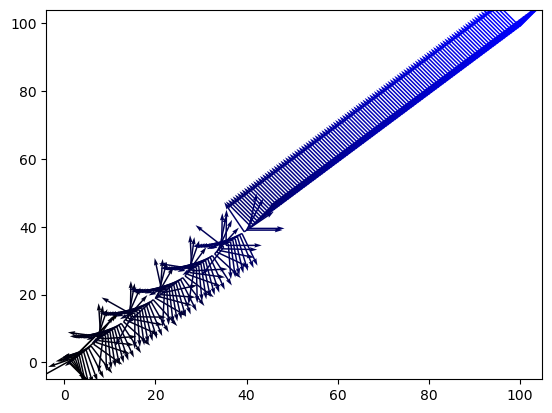

In [ ]:
plt.clf()
plt.close()
P_0 = np.array([
    [1,2,3,4],
    [2,1,2,3],
    [3,2,1,2],
    [4,3,2,1]
])


z = np.array([0,1]).reshape(2,1)
R = np.array([[4,0],
              [0,4]])
v= np.array([1,1]).reshape(2,1)
pos = np.array([1,0]).reshape(2,1)
x_0 = np.concatenate((pos,v),axis=0)

Q = np.zeros((4,4))
Q[2,2] = 0.2 # q_k^x
Q[3,3] = 0.2 # q_k^y
Q

H_CV = np.concatenate((np.eye(2),np.zeros((2,2))),axis=1)
H_CV

delta_t = 0.5
upper = np.concatenate((np.eye(2),delta_t*np.eye(2)),axis=1)
lower = np.concatenate((np.zeros((2,2)),np.eye(2)),axis=1)
phi_cv = np.concatenate((upper,lower))
phi_cv

x_n_minus_one = x_0
P_n_minus_one = P_0
location_arr = []
location_uncertainty = []
time_dur = 100
sample_size = np.arange(0, time_dur, 0.5).shape[0] *2
for t in np.arange(0, time_dur, 0.5):
    location_arr.append(x_n_minus_one[:2])
    location_arr.append(x_n_minus_one[:2])
    eigen_value, eigen_vector = np.linalg.eig(P_n_minus_one[:2,:2])
    location_uncertainty.append(eigen_vector[:,0]*eigen_value[0])
    location_uncertainty.append(eigen_vector[:,1]*eigen_value[1])
    z = v*t + x_0[:2]
    x_n,P_n = kalman_filter(x_n_minus_one,
                            P_n_minus_one,
                            phi_cv,
                            Q,
                            H_CV,R,z)
    #x_n,P_n = x_n_minus_one,P_n_minus_one
    x_n_minus_one,P_n_minus_one =  x_n,P_n

origin = np.array(location_arr)
V = np.array(location_uncertainty)

qui = plt.quiver(origin[:,0],origin[:,1], V[:,0], V[:,1], scale=21,color=[(0, 0, i) for i in np.linspace(0,1,sample_size) ])
#plt.quiverkey(qui, origin[:,0].ravel(), origin[:,1].ravel(), np.ones(origin[:,1].shape).ravel(), ['b' for _ in range(origin[:,1].shape[0])])
#plt.quiverkey(qui,0.7,0,2,"diker")
#plt.quiverkey(qui,4,4,100,"barak")

plt.show()


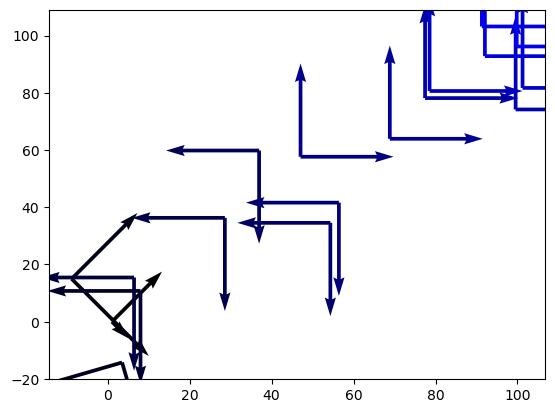

In [ ]:
plt.clf()


import numpy as np
rng = np.random.default_rng(12345)
rfloat = rng.random()
#rfloat


plt.close()
P_0 = np.array([
    [1,2,3,4],
    [2,1,2,3],
    [3,2,1,2],
    [4,3,2,1]
])


z = np.array([0,1]).reshape(2,1)
R = np.array([[4,0],
              [0,4]])
v= np.array([1,1]).reshape(2,1)
pos = np.array([1,0]).reshape(2,1)
x_0 = np.concatenate((pos,v),axis=0)

Q = np.zeros((4,4))
Q[1,1] = 20 # q_k^x
Q[0,0] = 20 # q_k^y
Q[2,2] = 4 # q_k^x
Q[3,3] = 5 # q_k^y
Q

H_CV = np.concatenate((np.eye(2),np.zeros((2,2))),axis=1)
H_CV

delta_t = 7
upper = np.concatenate((np.eye(2),delta_t*np.eye(2)),axis=1)
lower = np.concatenate((np.zeros((2,2)),np.eye(2)),axis=1)
phi_cv = np.concatenate((upper,lower))
phi_cv

x_n_minus_one = x_0
P_n_minus_one = P_0
location_arr = []
location_uncertainty = []
time_dur = 125
time_jumps =delta_t
sample_size = np.arange(0, time_dur, time_jumps).shape[0] *2
for t in np.arange(0, time_dur, time_jumps):
    location_arr.append(x_n_minus_one[:2])
    location_arr.append(x_n_minus_one[:2])
    eigen_value, eigen_vector = np.linalg.eig(P_n_minus_one[:2,:2])
    location_uncertainty.append(eigen_vector[:,0]*eigen_value[0])
    location_uncertainty.append(eigen_vector[:,1]*eigen_value[1])
    z = v*t + x_0[:2] + 10*np.random.randn(2, 1) # np.array([20*(rng.random()-0.5),10*(rng.random()-0.5)]).reshape(2,1)
    x_n,P_n = kalman_filter(x_n_minus_one,
                            P_n_minus_one,
                            phi_cv,
                            Q,
                            H_CV,R,z)
    #x_n,P_n = x_n_minus_one,P_n_minus_one
    x_n_minus_one,P_n_minus_one =  x_n,P_n

origin = np.array(location_arr)
V = np.array(location_uncertainty)

qui = plt.quiver(origin[:,0],origin[:,1], V[:,0], V[:,1], scale=21,color=[(0, 0, i) for i in np.linspace(0,1,sample_size) ])
#plt.quiverkey(qui, origin[:,0].ravel(), origin[:,1].ravel(), np.ones(origin[:,1].shape).ravel(), ['b' for _ in range(origin[:,1].shape[0])])
#plt.quiverkey(qui,0.7,0,2,"diker")
#plt.quiverkey(qui,4,4,100,"barak")

plt.show()

In [ ]:
np.arange(0, 100, 2)#.shape[0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [ ]:
rng.random()

0.9581797289213643